## readr & data.table

In addition to base R, there are dedicated packages to easily and efficiently import flat file data. We'll talk about two such packages: readr and data.table.

### read_csv
CSV files can be imported with read_csv(). It's a wrapper function around read_delim() that handles all the details for you. For example, it will assume that the first row contains the column names.

The dataset you'll be working with here is potatoes.csv. It gives information on the impact of storage period and cooking on potatoes' flavor. It uses commas to delimit fields in a record, and contains column names in the first row. The file is available in your workspace. Remember that you can inspect your workspace with dir().

In [2]:
# Load the readr package
library(readr)

# Import potatoes.csv with read_csv(): potatoes
potatoes <- read_csv("Potatoes.csv")

Warning message:
"package 'readr' was built under R version 3.6.3"
-- Column specification ------------------------------------------------------------------------------------------------
cols(
  area = col_double(),
  temp = col_double(),
  size = col_double(),
  storage = col_double(),
  method = col_double(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)



### read_tsv
Where you use read_csv() to easily read in CSV files, you use read_tsv() to easily read in TSV files. TSV is short for tab-separated values.

This time, the potatoes data comes in the form of a tab-separated values file; potatoes.txt is available in your workspace. In contrast to potatoes.csv, this file does not contain columns names in the first row, though.

There's a vector properties that you can use to specify these column names manually.

In [3]:
# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import potatoes.txt: potatoes
potatoes = read_tsv("Potatoes.txt", col_names = properties)

# Call head() on potatoes
head(potatoes)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  area = col_double(),
  temp = col_double(),
  size = col_double(),
  storage = col_double(),
  method = col_double(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)



area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7


### read_delim
Just as read.table() was the main utils function, read_delim() is the main readr function.

read_delim() takes two mandatory arguments:

1. file: the file that contains the data
2. delim: the character that separates the values in the data file

You'll again be working potatoes.txt; the file uses tabs ("\t") to delimit values and does not contain column names in its first line. It's available in your working directory so you can start right away. As before, the vector properties is available to set the col_names.

In [4]:
# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import potatoes.txt using read_delim(): potatoes

potatoes = read_delim("Potatoes.txt", delim = "\t", col_names = properties)
# Print out potatoes
print(potatoes)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  area = col_double(),
  temp = col_double(),
  size = col_double(),
  storage = col_double(),
  method = col_double(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)



# A tibble: 160 x 8
    area  temp  size storage method texture flavor moistness
   <dbl> <dbl> <dbl>   <dbl>  <dbl>   <dbl>  <dbl>     <dbl>
 1     1     1     1       1      1     2.9    3.2       3  
 2     1     1     1       1      2     2.3    2.5       2.6
 3     1     1     1       1      3     2.5    2.8       2.8
 4     1     1     1       1      4     2.1    2.9       2.4
 5     1     1     1       1      5     1.9    2.8       2.2
 6     1     1     1       2      1     1.8    3         1.7
 7     1     1     1       2      2     2.6    3.1       2.4
 8     1     1     1       2      3     3      3         2.9
 9     1     1     1       2      4     2.2    3.2       2.5
10     1     1     1       2      5     2      2.8       1.9
# ... with 150 more rows


### skip and n_max
Through skip and n_max you can control which part of your flat file you're actually importing into R.

skip specifies the number of lines you're ignoring in the flat file before actually starting to import data.
n_max specifies the number of lines you're actually importing.
Say for example you have a CSV file with 20 lines, and set skip = 2 and n_max = 3, you're only reading in lines 3, 4 and 5 of the file.

Watch out: Once you skip some lines, you also skip the first line that can contain column names!

potatoes.txt, a flat file with tab-delimited records and without column names, is available in your workspace.

In [5]:
# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import 5 observations from potatoes.txt: potatoes_fragment
potatoes_fragment <- read_tsv("Potatoes.txt", skip = 6, n_max = 5, col_names = properties)

print(potatoes_fragment)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  area = col_double(),
  temp = col_double(),
  size = col_double(),
  storage = col_double(),
  method = col_double(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)



# A tibble: 5 x 8
   area  temp  size storage method texture flavor moistness
  <dbl> <dbl> <dbl>   <dbl>  <dbl>   <dbl>  <dbl>     <dbl>
1     1     1     1       2      2     2.6    3.1       2.4
2     1     1     1       2      3     3      3         2.9
3     1     1     1       2      4     2.2    3.2       2.5
4     1     1     1       2      5     2      2.8       1.9
5     1     1     1       3      1     1.8    2.6       1.5


### col_types
You can also specify which types the columns in your imported data frame should have. You can do this with col_types. If set to NULL, the default, functions from the readr package will try to find the correct types themselves. You can manually set the types with a string, where each character denotes the class of the column: character(c), double (d), integer(i) and logical(l). _ skips the column as a whole.

potatoes.txt, a flat file with tab-delimited records and without column names, is again available in your workspace.

In [7]:
# readr is already loaded

# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import all data, but force all columns to be character: potatoes_char
potatoes_char <- read_tsv("Potatoes.txt", col_types = "cccccccc", col_names = properties)

# Print out structure of potatoes_char
str(potatoes_char)

tibble [160 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ area     : chr [1:160] "1" "1" "1" "1" ...
 $ temp     : chr [1:160] "1" "1" "1" "1" ...
 $ size     : chr [1:160] "1" "1" "1" "1" ...
 $ storage  : chr [1:160] "1" "1" "1" "1" ...
 $ method   : chr [1:160] "1" "2" "3" "4" ...
 $ texture  : chr [1:160] "2.9" "2.3" "2.5" "2.1" ...
 $ flavor   : chr [1:160] "3.2" "2.5" "2.8" "2.9" ...
 $ moistness: chr [1:160] "3" "2.6" "2.8" "2.4" ...
 - attr(*, "spec")=
  .. cols(
  ..   area = col_character(),
  ..   temp = col_character(),
  ..   size = col_character(),
  ..   storage = col_character(),
  ..   method = col_character(),
  ..   texture = col_character(),
  ..   flavor = col_character(),
  ..   moistness = col_character()
  .. )


In [8]:
# Import without col_types
hotdogs <- read_tsv("hotdogs.txt", col_names = c("type", "calories", "sodium"))

# Display the summary of hotdogs
summary(hotdogs)

# The collectors you will need to import the data
fac <- col_factor(levels = c("Beef", "Meat", "Poultry"))
int <- col_integer()

# Edit the col_types argument to import the data correctly: hotdogs_factor
hotdogs_factor <- read_tsv("hotdogs.txt",
                           col_names = c("type", "calories", "sodium"),
                           col_types = list(fac, int, int))

# Display the summary of hotdogs_factor
summary(hotdogs_factor)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  calories = col_double(),
  sodium = col_double()
)



     type              calories         sodium     
 Length:54          Min.   : 86.0   Min.   :144.0  
 Class :character   1st Qu.:132.0   1st Qu.:362.5  
 Mode  :character   Median :145.0   Median :405.0  
                    Mean   :145.4   Mean   :424.8  
                    3rd Qu.:172.8   3rd Qu.:503.5  
                    Max.   :195.0   Max.   :645.0  

      type       calories         sodium     
 Beef   :20   Min.   : 86.0   Min.   :144.0  
 Meat   :17   1st Qu.:132.0   1st Qu.:362.5  
 Poultry:17   Median :145.0   Median :405.0  
              Mean   :145.4   Mean   :424.8  
              3rd Qu.:172.8   3rd Qu.:503.5  
              Max.   :195.0   Max.   :645.0  

### fread
You still remember how to use read.table(), right? Well, fread() is a function that does the same job with very similar arguments. It is extremely easy to use and blazingly fast! Often, simply specifying the path to the file is enough to successfully import your data.

Don't take our word for it, try it yourself! You'll be working with the potatoes.csv file, that's available in your workspace. Fields are delimited by commas, and the first line contains the column names.

In [11]:
# load the data.table package using library()
library(data.table)

# Import potatoes.csv with fread(): potatoes
potatoes <- fread("Potatoes.csv")

# Print out potatoes
print(potatoes)

     area temp size storage method texture flavor moistness
  1:    1    1    1       1      1     2.9    3.2       3.0
  2:    1    1    1       1      2     2.3    2.5       2.6
  3:    1    1    1       1      3     2.5    2.8       2.8
  4:    1    1    1       1      4     2.1    2.9       2.4
  5:    1    1    1       1      5     1.9    2.8       2.2
 ---                                                       
156:    2    2    2       4      1     2.7    3.3       2.6
157:    2    2    2       4      2     2.6    2.8       2.3
158:    2    2    2       4      3     2.5    3.1       2.6
159:    2    2    2       4      4     3.4    3.3       3.0
160:    2    2    2       4      5     2.5    2.8       2.3


### fread: more advanced use
Now that you know the basics about fread(), you should know about two arguments of the function: drop and select, to drop or select variables of interest.

Suppose you have a dataset that contains 5 variables and you want to keep the first and fifth variable, named "a" and "e". The following options will all do the trick:

fread("path/to/file.txt", drop = 2:4)

fread("path/to/file.txt", select = c(1, 5))

fread("path/to/file.txt", drop = c("b", "c", "d"))

fread("path/to/file.txt", select = c("a", "e"))

Let's stick with potatoes since we're particularly fond of them here at DataCamp. The data is again available in the file potatoes.csv, containing comma-separated records.

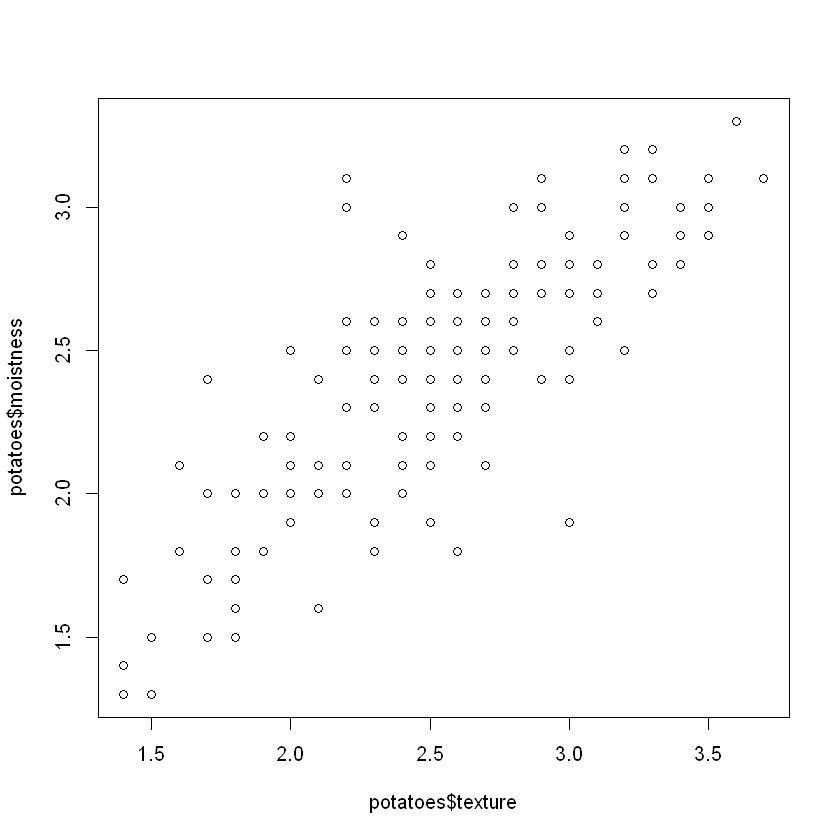

In [12]:
# Import columns 6 and 8 of potatoes.csv: potatoes
potatoes = fread("Potatoes.csv", select = c(6, 8))

# Plot texture (x) and moistness (y) of potatoes
plot(potatoes$texture, potatoes$moistness)